### Integrantes

- Andres Eduardo Rubiano Martinez
- Juan Stiven Avila Velasco
- Diego Romero Iregui


# 1.Algoritmos  para el problema del agente viajero

## 1.0. Función para generar puntos aleatorios

[[0.5471482876630158, -0.340817281404763], [0.5386389770928496, -0.39199329125201876], [0.18604593905177688, 0.0578916604039694], [0.0035427534443498937, 0.0019356192319302972], [0.44696034317826705, 0.7023492993682555], [-0.5067232927126862, 0.36087617332706684], [0.4164787279353374, -0.8487925970573279], [-0.025035795607871447, -0.14243157522156671], [-0.02502640180930568, -0.1978831432419042], [0.07248910448848504, -0.9402733625526728]]
0.05187863095982742


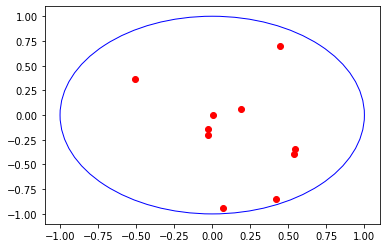

In [ ]:
import random
import matplotlib.pyplot as plt
import math
import numpy as np

# generate random nodes inside a circle
def generateRandomNodesInsideCircle(n):
  randomNodes = []
  for i in range(n):
    t = random.random()*2*math.pi
    r = random.random()
    randomNodes.append([r*math.sin(t),r*math.cos(t)])
  return randomNodes

# distance between nodes
def distanceBetweenNodes(x,y):
  return math.sqrt((x[0]-y[0])**2+(x[1]-y[1])**2)
  
# vector of random nodes
x = generateRandomNodesInsideCircle(10)
# verification
x_pos = []
y_pos = []
for i in range(len(x)):
  x_pos.append(x[i][0])
  y_pos.append(x[i][1])
print(x) 
plt.figure()
print(distanceBetweenNodes(x[0],x[1]))
plt.plot(x_pos,y_pos,'ro')
circle1 = plt.Circle((0, 0), 1, color='b',fill =False)
plt.gca().add_patch(circle1)

## 1.1. Random-restart hill-climbing
Para este problema estamos minimizando la funcion de distancias (1) de los puntos dentro de la bola centrada en $(0,0)$ de radio 1.
$$(1) \sum_{x,y\in B[(0,0),1)]}d(x,y)$$
donde:
$$d(x,y) = \sqrt{(x(1)-y(1))^{2}+(x(2)-y(2))^{2}} $$
Primero generamos un recorrido aleatorio que pase por todos los nodos, luego generamos un candidato intercambiando la posición de una pareja de nodos adyacentes del recorrido, si la funcion de distancias del candidato es menor que la funcion de distancias del actual recorrido, entonces reemplazamos al recorrido anterior por el nuevo candidato.

number of tests:
40
Size:  10 Best score:  4.541279927909054
Size:  20 Best score:  9.164480710058676
Size:  30 Best score:  13.966698616418054
Size:  40 Best score:  19.0893730257089
Size:  50 Best score:  23.96490444215215
Size:  60 Best score:  31.975524912932183
Size:  70 Best score:  35.87615165204985
Size:  80 Best score:  42.205318124838634
Size:  90 Best score:  44.8786637924219
Size:  100 Best score:  45.16332796852001
Size:  110 Best score:  57.52497731760723
Size:  120 Best score:  66.35932104761947
Size:  130 Best score:  70.96625539439673
Size:  140 Best score:  73.0316404293194
Size:  150 Best score:  80.65523027588281
Size:  160 Best score:  90.74992813854986
Size:  170 Best score:  95.80804007372893
Size:  180 Best score:  95.78537103078581
Size:  190 Best score:  105.56779578062638
Size:  200 Best score:  109.90936455799933
Size:  210 Best score:  114.16939715117738
Size:  220 Best score:  125.2191016524292
Size:  230 Best score:  123.61333369398054
Size:  240 Best sco

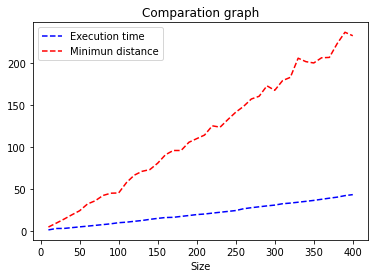

In [ ]:
#Random-restart Hill-Climbing
import math
import random
import matplotlib.pyplot as plt
import time



class HillClimb(object):
    def __init__(self, coords):
        self.coords = coords
        self.N = len(coords)
        self.best= self.initial_solution()
        self.best_score=self.objective(self.best)
        self.nodes = [i for i in range(self.N)]

    def initial_solution(self):
        """
        Get a random path
        """
        self.nodes = [i for i in range(self.N)]
        self.cur_node = random.choice(self.nodes)  # start from a random node
        solution = [self.cur_node]

        free_nodes = set(self.nodes)
        free_nodes.remove(self.cur_node)
        while free_nodes:
            next_node = random.sample(free_nodes,1)  # random neighbour
            free_nodes.remove(next_node[0])
            solution.append(next_node[0])
            cur_node = next_node

        return solution

    def objective(self, solution):
        """
        Total distance of the current solution path.
        """
        cur_fit = 0
        for i in range(len(solution)):
          if i!= (len(solution)-1):
            cur_fit += self.dist(solution[i], solution[(i + 1)])
          else:
            cur_fit += self.dist(solution[i], solution[0])
        return cur_fit

    def dist(self, node_0, node_1):
        """
        Euclidean distance between two nodes.
        """
        coord_0, coord_1 = self.coords[node_0], self.coords[node_1]
        return math.sqrt((coord_0[0] - coord_1[0]) ** 2 + (coord_0[1] - coord_1[1]) ** 2)

    def swap_points(self, solution):
        """
        Swap two points of the path
        """
        temp = solution[1:]
        best_score = self.objective(solution)
        best = solution
        
        
        n = random.randint(0, len(temp)-1)

        if n!= len(temp)-1:
          temp[n], temp[n+1]=temp[n+1], temp[n]
        else:
          temp[0], temp[n]= temp[n], temp[0]
        
        
        temp_solution =[]
        temp_solution.append(solution[0])
        temp_solution+=temp

        if self.objective(temp_solution)<best_score:
          best_score=self.objective(temp_solution)
          best=temp_solution
        
        return best, best_score


    def hill_climb(self, max_evaluations):
        """
        Execute hill climbing algorithm.
        """
        # Initialize with the greedy solution.
        self.best = self.initial_solution()
        self.best_score = self.objective(self.best)
      
        num_evaluations=1
        n=0
        while num_evaluations < max_evaluations:

          if num_evaluations >= max_evaluations:
                  break
          
          # see if this move is better than the current
          next, next_score= self.swap_points(self.best)
          num_evaluations+=1
          if next_score < self.best_score:
              self.best=next
              self.best_score=next_score
              continue
          if next_score > self.best_score:
              continue 

        return (num_evaluations,self.best_score,self.best)

def random_hill_climb(hc, max_evaluations):
  best=hc.best
  best_score=hc.best_score

  num_evaluations=0
  while num_evaluations < max_evaluations:
        remaining_evaluations=max_evaluations-num_evaluations

        evaluated,score,found=hc.hill_climb(max_evaluations/100)
        
        num_evaluations+=evaluated
        if score < best_score or best is None:
            best_score=score
            best=found    
        hc.initial_solution()
  return best_score,best

sizes = []
for i in range(10,410,10):
  sizes.append(i)
print('number of tests:')
print(len(sizes))
times = []
distances = []

for i in range(len(sizes)):  
  inicio = time.time()
  coords = generateRandomNodesInsideCircle(sizes[i]) 
  hc = HillClimb(coords)
  best_score,best = random_hill_climb(hc, 50000)
  hc.best= best
  hc.best_score= hc.objective(best)
  print("Size: ",sizes[i], "Best score: ", hc.best_score)
  fin = time.time()
  times.append(fin-inicio)
  distances.append(hc.best_score)

plt.figure()
plt.plot(sizes,times,'b--',label = 'Execution time')
plt.plot(sizes,distances,'r--',label = 'Minimun distance')
plt.title('Comparation graph')
plt.xlabel("Size")
plt.legend()
plt.show()

## 1.2. Simulated Annealing
Para este problema estamos minimizando la funcion de distancias (1) de los puntos dentro de la bola centrada en $(0,0)$ de radio 1.
$$(1) \sum_{x,y\in B[(0,0),1)]}d(x,y)$$
donde:
$$d(x,y) = \sqrt{(x(1)-y(1))^{2}+(x(2)-y(2))^{2}} $$
la probabilidad de aceptar un candidato esta dada por:
$$e^{\frac{-|f_c - f_i|}{T}}$$
donde:
$$f_c \text{ es el fitness candidato (posible solucion)}$$
$$ T = \sqrt{N} \text{ con N el tamano de la poblacion} $$
$$f_i \text{ fitness en la iteracion actual}$$

number of tests:
40
Starting annealing.
Best fitness obtained:  4.995178922754945
Improvement over greedy heuristic:  8.97%
Starting annealing.
Best fitness obtained:  24.65609799415998
Improvement over greedy heuristic:  0.00%
Starting annealing.
Best fitness obtained:  35.69517881803288
Improvement over greedy heuristic:  0.00%
Starting annealing.
Best fitness obtained:  41.234469604177924
Improvement over greedy heuristic:  0.00%
Starting annealing.
Best fitness obtained:  48.66792096581128
Improvement over greedy heuristic:  0.00%
Starting annealing.
Best fitness obtained:  52.45833203830342
Improvement over greedy heuristic:  0.00%
Starting annealing.
Best fitness obtained:  60.3328141067844
Improvement over greedy heuristic:  0.00%
Starting annealing.
Best fitness obtained:  62.21483665321431
Improvement over greedy heuristic:  0.00%
Starting annealing.
Best fitness obtained:  67.307476983879
Improvement over greedy heuristic:  0.00%
Starting annealing.
Best fitness obtained:  71

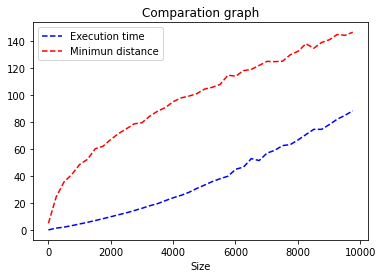

In [ ]:
#Simulated annealing
import math
import random
import matplotlib.pyplot as plt
import time

class SimAnneal(object):
    def __init__(self, coords, T=-1, alpha=-1, stopping_T=-1, stopping_iter=-1):
        self.coords = coords
        self.N = len(coords)
        self.T = math.sqrt(self.N) if T == -1 else T
        self.T_save = self.T  # save inital T to reset if batch annealing is used
        self.alpha = 0.995 if alpha == -1 else alpha
        self.stopping_temperature = 1e-8 if stopping_T == -1 else stopping_T
        self.stopping_iter = 100000 if stopping_iter == -1 else stopping_iter
        self.iteration = 1

        self.nodes = [i for i in range(self.N)]

        self.best_solution = None
        self.best_fitness = float("Inf")
        self.fitness_list = []

    def initial_solution(self):
        """
        Greedy algorithm to get an initial solution (closest-neighbour).
        """
        cur_node = random.choice(self.nodes)  # start from a random node
        solution = [cur_node]

        free_nodes = set(self.nodes)
        free_nodes.remove(cur_node)
        while free_nodes:
            next_node = min(free_nodes, key=lambda x: self.dist(cur_node, x))  # nearest neighbour
            free_nodes.remove(next_node)
            solution.append(next_node)
            cur_node = next_node

        cur_fit = self.fitness(solution)
        if cur_fit < self.best_fitness:  # If best found so far, update best fitness
            self.best_fitness = cur_fit
            self.best_solution = solution
        self.fitness_list.append(cur_fit)
        return solution, cur_fit

    def dist(self, node_0, node_1):
        """
        Euclidean distance between two nodes.
        """
        coord_0, coord_1 = self.coords[node_0], self.coords[node_1]
        return math.sqrt((coord_0[0] - coord_1[0]) ** 2 + (coord_0[1] - coord_1[1]) ** 2)

    def fitness(self, solution):
        """
        Total distance of the current solution path.
        """
        cur_fit = 0
        for i in range(self.N):
            cur_fit += self.dist(solution[i % self.N], solution[(i + 1) % self.N])
        return cur_fit

    def p_accept(self, candidate_fitness):
        """
        Probability of accepting if the candidate is worse than current.
        Depends on the current temperature and difference between candidate and current.
        """
        return math.exp(-abs(candidate_fitness - self.cur_fitness) / self.T)

    def accept(self, candidate):
        """
        Accept with probability 1 if candidate is better than current.
        Accept with probabilty p_accept(..) if candidate is worse.
        """
        candidate_fitness = self.fitness(candidate)
        if candidate_fitness < self.cur_fitness:
            self.cur_fitness, self.cur_solution = candidate_fitness, candidate
            if candidate_fitness < self.best_fitness:
                self.best_fitness, self.best_solution = candidate_fitness, candidate
        else:
            if random.random() < self.p_accept(candidate_fitness):
                self.cur_fitness, self.cur_solution = candidate_fitness, candidate

    def anneal(self):
        """
        Execute simulated annealing algorithm.
        """
        # Initialize with the greedy solution.
        self.cur_solution, self.cur_fitness = self.initial_solution()

        print("Starting annealing.")
        while self.T >= self.stopping_temperature and self.iteration < self.stopping_iter:
            candidate = list(self.cur_solution)
            l = random.randint(2, self.N - 1)
            i = random.randint(0, self.N - l)
            candidate[i : (i + l)] = reversed(candidate[i : (i + l)])
            self.accept(candidate)
            self.T *= self.alpha
            self.iteration += 1

            self.fitness_list.append(self.cur_fitness)

        print("Best fitness obtained: ", self.best_fitness)
        improvement = 100 * (self.fitness_list[0] - self.best_fitness) / (self.fitness_list[0])
        print(f"Improvement over greedy heuristic: {improvement : .2f}%")

    def batch_anneal(self, times=10):
        """
        Execute simulated annealing algorithm `times` times, with random initial solutions.
        """
        for i in range(1, times + 1):
            print(f"Iteration {i}/{times} -------------------------------")
            self.T = self.T_save
            self.iteration = 1
            self.cur_solution, self.cur_fitness = self.initial_solution()
            self.anneal()

    def visualize_routes(self):
        """
        Visualize the TSP route with matplotlib.
        """
        plotTSP([self.best_solution], self.coords)

    def plot_learning(self):
        """
        Plot the fitness through iterations.
        """
        plt.plot([i for i in range(len(self.fitness_list))], self.fitness_list)
        plt.ylabel("Fitness")
        plt.xlabel("Iteration")
        plt.show()

def plotTSP(paths, points, num_iters=1):

    """
    path: List of lists with the different orders in which the nodes are visited
    points: coordinates for the different nodes
    num_iters: number of paths that are in the path list
    """

    # Unpack the primary TSP path and transform it into a list of ordered
    # coordinates

    x = []; y = []
    for i in paths[0]:
        x.append(points[i][0])
        y.append(points[i][1])

    plt.plot(x, y, 'co')

    # Set a scale for the arrow heads (there should be a reasonable default for this, WTF?)
    a_scale = float(max(x))/float(100)

    # Draw the older paths, if provided
    if num_iters > 1:

        for i in range(1, num_iters):

            # Transform the old paths into a list of coordinates
            xi = []; yi = [];
            for j in paths[i]:
                xi.append(points[j][0])
                yi.append(points[j][1])

            plt.arrow(xi[-1], yi[-1], (xi[0] - xi[-1]), (yi[0] - yi[-1]),
                    head_width = a_scale, color = 'r',
                    length_includes_head = True, ls = 'dashed',
                    width = 0.001/float(num_iters))
            for i in range(0, len(x) - 1):
                plt.arrow(xi[i], yi[i], (xi[i+1] - xi[i]), (yi[i+1] - yi[i]),
                        head_width = a_scale, color = 'r', length_includes_head = True,
                        ls = 'dashed', width = 0.001/float(num_iters))

    # Draw the primary path for the TSP problem
    plt.arrow(x[-1], y[-1], (x[0] - x[-1]), (y[0] - y[-1]), head_width = a_scale,
            color ='g', length_includes_head=True)
    for i in range(0,len(x)-1):
        plt.arrow(x[i], y[i], (x[i+1] - x[i]), (y[i+1] - y[i]), head_width = a_scale,
                color = 'g', length_includes_head = True)

    #Set axis too slitghtly larger than the set of x and y
    plt.xlim(min(x)*1.1, max(x)*1.1)
    plt.ylim(min(y)*1.1, max(y)*1.1)
    circle1 = plt.Circle((0, 0), 1, color='b',fill =False)
    plt.gca().add_patch(circle1)
    plt.show()

sizes = []
for i in range(10,10000,250):
  sizes.append(i)
print('number of tests:')
print(len(sizes))
times = []
distances = []

for i in range(len(sizes)):  
  inicio = time.time()
  coords = generateRandomNodesInsideCircle(sizes[i])  # generate_random_coords(100)
  sa = SimAnneal(coords, stopping_iter=5000)
  sa.anneal()
  #sa.visualize_routes()
  #sa.plot_learning()
  fin = time.time()
  times.append(fin-inicio)
  distances.append(sa.best_fitness)

plt.figure()
plt.plot(sizes,times,'b--',label = 'Execution time')
plt.plot(sizes,distances,'r--',label = 'Minimun distance')
plt.title('Comparation graph')
plt.xlabel("Size")
plt.legend()
plt.show()

## 1.3. Genetic Algorithm
Para este problema estamos minimizando la funcion de distancias (1) de los puntos dentro de la bola centrada en $(0,0)$ de radio 1.
$$(1) \sum_{x,y\in B[(0,0),1)]}d(x,y)$$
donde:
$$d(x,y) = \sqrt{(x(1)-y(1))^{2}+(x(2)-y(2))^{2}} $$

Primero generamos aleatoriamente una "población", que estará compuesta por potenciales caminos solución. Para obtener poblaciones con los mejores caminos, se procurará filtrar los caminos con la función (1) más grande, y los mejores podrán pasar sus caracteristícas a siguentes generaciones. El cruce se realizará de la siguiente manera:
Se copian la mitad de los nodos de un padre, en el orden en que aparecen. Luego, para llenar los nodos faltantes se consultará en qué momento se visitan en el otro padre, y serán insertados en esa misma posición.
Finalmente, habrá una probabilidad de que el cruce mute, es decir, que dos nodos cambien el orden en que son visitados.

number of tests:
40
Tamaño del problema N: 10   Distancia mínima:  3.078729951115175
Tamaño del problema N: 20   Distancia mínima:  10.341527870505736
Tamaño del problema N: 30   Distancia mínima:  12.698710767458945
Tamaño del problema N: 40   Distancia mínima:  21.65351486838028
Tamaño del problema N: 50   Distancia mínima:  23.05524715480742
Tamaño del problema N: 60   Distancia mínima:  25.21388286717326
Tamaño del problema N: 70   Distancia mínima:  36.815442278434446
Tamaño del problema N: 80   Distancia mínima:  39.37903062632262
Tamaño del problema N: 90   Distancia mínima:  38.743474937579265
Tamaño del problema N: 100   Distancia mínima:  40.858723892293014
Tamaño del problema N: 110   Distancia mínima:  52.924421213335556
Tamaño del problema N: 120   Distancia mínima:  54.350581552002915
Tamaño del problema N: 130   Distancia mínima:  66.4909519483017
Tamaño del problema N: 140   Distancia mínima:  61.87520081162373
Tamaño del problema N: 150   Distancia mínima:  81.79940009

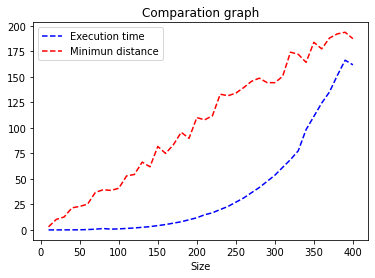

In [ ]:
#Diego:

from numpy.random import randint
from numpy.random import rand

import numpy as np
import random
import math
import time

  
def crossover(p1,p2,r_cross):

  c1 = []
  c2 = []

  #r_cross es la probabilidad de que ocurra un crossover
  if rand() < r_cross:

    #Se obtiene la mitad de los elementos de uno de los padres
    for i in range(1,len(p1),2):
      c1.append(p1[i])
      c2.append(p2[i])

    
    for j in range(0,len(p1)):

      #Se termina de llenar los hijos
      #Se busca en el otro padre los nodos que le hacen falta
      #Luego se insertan en la posición en la que se encuentra en el padre
    
      if p1[j] not in c2:
        c2.insert(j,p1[j])

      if p2[j] not in c1:
        c1.insert(j,p2[j])  

      if len(c1)==len(p1) and len(c2)==len(p1):
        break


  else:

    #Si por azar no ocurre un crossover, los hijos son iguales a los padres
    c1, c2 = p1.copy(), p2.copy()    
  


  return[c1,c2]


def mutation(camino, r_mut):
  
  #r_mut es la probabilidad de que ocurra una mutación

  if rand() < r_mut:

    #Si una mutación ocurre, se cambian de lugar dos nodos al azar en el camino
    
    First_pos = randint(0,len(camino))
    Second_pos = randint(0,len(camino))
    Fnodo = camino[First_pos]
    Snodo = camino[Second_pos]

    camino[First_pos] = Snodo
    camino[Second_pos] = Fnodo

  return camino


def total_dis(nodos,camino):

  #Calcula la distancia total del camino

  distTotal=0
  for i in range(0,len(camino)-1):

    #Se suma la distancia entre cada nodo

    actual = nodos[camino[i]]
    siguiente = nodos[camino[i+1]]

    diffx = actual[0]-siguiente[0]
    diffy = actual[1]-siguiente[1]

    distTotal += math.sqrt((diffx)**2 + (diffy)**2)

  return distTotal
  
def selection(pop,scores):
  # primera seleccion random
    selection_ix = randint(len(pop))
    for ix in randint(0, len(pop), 2):
        # check if better
        if scores[ix] < scores[selection_ix]:
            selection_ix = ix
    return pop[selection_ix]

def genetic_Taller(nodos, n_iter, n_pop, r_cross, r_mut):

  # Lista de caminos aleatorios
  camino = range(0,len(nodos))
  pop=[]
  for i in range(n_pop):
    pop.append(random.sample(camino,len(camino)))
  
  #La distancia total del mejor camino y el camino
  best, best_eval = 0,np.inf
  
  #generaciones
  for gen in range(n_iter):

      # Calcular la distancia total de cada camino
      scores = [total_dis(nodos,cam) for cam in pop]

      # Actualizar mejor solución
      for i in range(n_pop):
          if scores[i] < best_eval:
              best, best_eval = pop[i], scores[i]
             
      # selección, (filtrar los peores)
      selected = [selection(pop, scores) for _ in range(n_pop)]

      # crear la nueva generación
      children = list()
      for i in range(0, n_pop, 2):
          # seleccionar los padres por parejas
          p1, p2 = selected[i], selected[i+1]

          # crossover
          for c in crossover(p1, p2, r_cross):

              # mutation
              c = mutation(c, r_mut)
              children.append(c)

      # actualizar población
      pop = children
  return [best, best_eval]

sizes = []
for i in range(10,410,10):
  sizes.append(i)
print('number of tests:')
print(len(sizes))


times = []
distances = []

for i in range(len(sizes)):  
  

  inicio = time.time()
    
  # Número de generaciones
  n_iter = sizes[i]

  # Asegurarse de que el tamaño de la población sea par
  IoP=0
  if (sizes[i]/2)%2==1:
    IoP = 1
  # Población
  n_pop = int(sizes[i]/2)+IoP

  # probabilidad de crossover
  r_cross = 0.9
  # probabilidad de mutación
  r_mut = 0.2


  coords = generateRandomNodesInsideCircle(sizes[i])  # generate_random_coords(100)
  D = genetic_Taller(coords, n_iter, n_pop, r_cross, r_mut)
  #sa.visualize_routes()
  #sa.plot_learning()
  fin = time.time()
  times.append(fin-inicio)
  distances.append(D[1])
  print("Tamaño del problema N:",sizes[i], "  Distancia mínima: ",D[1],"  Tiempo de ejecución: ",fin-inicio)

plt.figure()
plt.plot(sizes,times,'b--',label = 'Execution time')
plt.plot(sizes,distances,'r--',label = 'Minimun distance')
plt.title('Comparation graph')
plt.xlabel("Size")
plt.legend()
plt.show()

## 1.4. Comparaciones


number of tests:
40


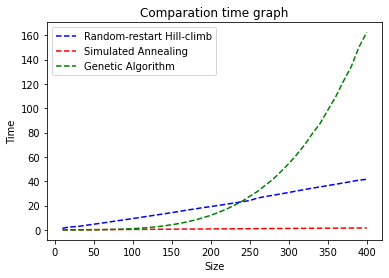

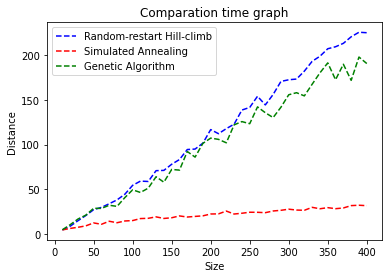

In [ ]:
sizes = []
for i in range(10,410,10):
  sizes.append(i)
print('number of tests:')
print(len(sizes))

times_hc=[]
times_sa=[]
times_gen=[]

distances_hc=[]
distances_sa=[]
distances_gen=[]

for i in range(len(sizes)):
  coords = generateRandomNodesInsideCircle(sizes[i])   
  #############
  inicio = time.time()
  hc = HillClimb(coords)
  best_score,best = random_hill_climb(hc, 50000)
  hc.best= best
  hc.best_score= hc.objective(best)
  fin = time.time()
  times_hc.append(fin-inicio)
  distances_hc.append(hc.best_score)
  #############
  inicio = time.time()
  sa = SimAnneal(coords, stopping_iter=5000)
  sa.anneal()
  fin = time.time()
  times_sa.append(fin-inicio)
  distances_sa.append(sa.best_fitness)
  ############
  inicio = time.time()
  n_iter = sizes[i]
  IoP=0
  if (sizes[i]/2)%2==1:
    IoP = 1
  n_pop = int(sizes[i]/2)+IoP
  r_cross = 0.9
  r_mut = 0.2
  D = genetic_Taller(coords, n_iter, n_pop, r_cross, r_mut)
  fin = time.time()
  times_gen.append(fin-inicio)
  distances_gen.append(D[1])
  #############

plt.figure()
plt.plot(sizes,times_hc,'b--',label = 'Random-restart Hill-climb')
plt.plot(sizes,times_sa,'r--',label = 'Simulated Annealing')
plt.plot(sizes,times_gen,'g--',label = 'Genetic Algorithm')
plt.title('Comparation time graph')
plt.xlabel("Size")
plt.ylabel("Time")
plt.legend()
plt.show()

plt.figure()
plt.plot(sizes,distances_hc,'b--',label = 'Random-restart Hill-climb')
plt.plot(sizes,distances_sa,'r--',label = 'Simulated Annealing')
plt.plot(sizes,distances_gen,'g--',label = 'Genetic Algorithm')
plt.title('Comparation Distance graph')
plt.xlabel("Size")
plt.ylabel("Distance")
plt.legend()
plt.show()

## Conclusiones
*   El tiempo que toma el genetic algorithm es exponencial, mientras que en el caso del random restart hilll-climbing y el simulated annealing es lineal.
*   El algoritmo que toma mas tiempo en obtener una solucion es el algoritmo genetico, mientras que el que toma menos tiempo es el simulated annealing
*   El algoritmo que da mejores soluciones es el simulated annealing
*   Los resultados obtenidos por el genetic algorithm y el random restart hilll-climbing son parecidos, siendo un poco mayor los del random restart hill-climbing




# 2.Genetic algorithm for QAP
Para este problema se implementa un vector (gen) de 25 entradas en el cual:
$$gen = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24] $$
La posicion i del vector nos indica la posible locacion del almacen en nuestro problema y el valor que se indica en esa posicion el almacen que se coloco en esa posicion. En este orden de idea gen[0] indica que en la locacion 0 de nuestro problema se coloco el almacen 0.
Nuestra funcion fitness esta dada por:
$$\sum_{j,k,c}d(j,k) * flows(c(j,k))$$
Donde j,k son todas las posiciones del problema, c es la configuracion actual de los almacenes en el problema

Las distancias y los flujos estan dadas por las matrices en el archivo .data

**FAVOR CARGAR EL ARCHIVO .data PARA CORRER EL ALGORITMO**

Para escoger los mejores candidatos se escoge los dos mejores fitness de la poblacion, para el crossover se intercambian los genes entre los padres y luego si se repiten estos se eliminan los genes repetidos y se agregan los faltantes aleatoriamente y para la mutacion se intercambian aleatoriamente dos genes.

Se obtuvo un desempeno de: 4282

con la configuracion: geneticAlgorithm(25, 20, 1000000)

a los: 1 h 43 min 52 s, completado a las 20:48 

In [ ]:
# genetic algorithm for QAP

import random
import numpy as np
import time

data = np.loadtxt(r'nug25.dat', delimiter='\n', dtype=list)
distances = []
flows = []
for i in range(25):
  distancesRow = data[i+2].split()
  flowsRow = data[i+27].split()
  distances.append([])
  flows.append([])
  for j in range(25):
    distances[i].append(int(distancesRow[j]))
    flows[i].append(int(flowsRow[j]))

# function to generate new population 
def generateInitialPopulation(problem_size, population_size):
    """Generate list of random chromosome
    Parameters
    ----------
    problem_size : int
        size of the problem i.e no of location/facilites
    population_size : int
        number of data we want in our list 
    Returns
    -------
    list
        return list of chromosome
    """

    population = []

    for i in range (population_size):

        # create list with size == problem size and random values ranging from 0 to problem_size
        x = random.sample(range(problem_size), problem_size)
        
        # add list x to population. The item in the second index (0) is the fitness score we'll use later
        population.append([x, 0])

    return population

# cost function to get cost of each chromosome
def costFunction(population) -> list:
    """Gets the fitness score for each data in a population using the formula minϕ∈Sn ∑ni=1 ∑nj=1 fij⋅dϕ(i)ϕ(j)
    Parameters
    ----------
    population : list
        list of chromosomes
    distances : list
        list of distance mapping for each data in the population
    flows : list
        list of flow mappings for each data in the population
    Returns
    -------
    list
        list of chromosomes with updated fitness score
    """
    for chromosome in population:

        cost = 0

        searched_list = []

        for j in chromosome[0]:
            for k in chromosome[0]:

                # since problem is a one-to-one type, mapping (1,2) == (2,1).
                #if (k, j) in searched_list or (j, k) in searched_list: continue

                # cost function = cost + flow(f1, f2) * distance(d1, d2) for every f1, f2, d1, d2.
                cost += distances[j][k] * flows[chromosome[0][j]][chromosome[0][k]]

                # append mapping to searched list to save time.
                searched_list.append((j, k))


        chromosome[1] = cost


    return population

# selection function
def selectionFunction(population) -> list:
    """Select data with the minimum fitness score from a population using the tournament selection technique
    Parameters
    ----------
    population : list
        list of chromosome
    Returns
    -------
    list
        data with the minimum fitness score from the population
    """

    # return random list size population_size/5 from population 
    '''random_k_list = random.sample(population, int(len(population)/5))

    # sort random list using their fitness score 
    random_k_list.sort(key = lambda x: x[1])

    # return first element after sort
    return random_k_list[0]'''
    population.sort(key = lambda x: x[1])

    # return first element after sort
    return population[0],population[1]

def crossoverFunction(data1, data2):
    """Perform modified version of uniform crossover on 2 chromosomes
    Parameters
    ----------
    data1 : list
         list containing chromosome and fitness score
    data2 : list
         list containing chromosome and fitness score
    Returns
    -------
    list
        return list containing 2 data with modified chromosome
    """

    # for this function, I modified the uniform crossover function to take care of duplicates after crossover.

    data1[1] = 0
    data2[1] = 0
    chromosome1 = list.copy(data1[0])
    chromosome2 = list.copy(data2[0])


    # for each index in both chromosomes, use a coin toss to determine which index is crossed over
    for i in range(len(chromosome1)):

        cointoss = random.randrange(2)
        if cointoss == 0:
            chromosome1[i], chromosome2[i] = chromosome2[i], chromosome1[i]

    # duplicate elements
    chromosome1 = list(dict.fromkeys(chromosome1))
    chromosome2 = list(dict.fromkeys(chromosome2))
    if len(chromosome1) < 25:
      a = random.sample(range(25), 25)
      for i in range(len(a)):
        if a[i] not in chromosome1:
          chromosome1.insert(random.randrange(len(chromosome1)),a[i])
    if len(chromosome2) < 25:
      b = random.sample(range(25), 25)
      for i in range(len(b)):
        if b[i] not in chromosome2:
          chromosome2.insert(random.randrange(len(chromosome2)),b[i])

    # replaced the modified chromosomes in the data
    data1[0] = chromosome1
    data2[0] = chromosome2

    return [data1, data2]

def mutationFunction(data) -> list:
    """Modifies the chromosome in a data
    Parameters
    ----------
    gene : list
        specific data that needs modification
    Returns
    -------
    list
        returns the Modified data
    """

    chromosome = data[0]

    randomNum1 = random.randint(0, len(chromosome) - 1)
    randomNum2 = random.randint(0, len(chromosome) - 1)

    # exchange values at 2 random indexes
    chromosome[randomNum1], chromosome[randomNum2] = chromosome[randomNum2], chromosome[randomNum1]

    return data

def geneticAlgorithm(problem_size, population_size, number_of_iterations):


    # generate initial population
    population = generateInitialPopulation(problem_size, population_size)

    
    solution =  float("inf")
    next_generation = []
    n = 0


    while n < number_of_iterations:

        # get cost function for each data in population
        population = costFunction(population=population)

        # sort population according to fitness score
        population.sort(key = lambda x: x[1])

        # get fittest data
        fittest_data = list.copy(population[0])


        # check for the fittest data and print it out
        if fittest_data[1] < solution:
            result = list.copy(fittest_data)
            solution = fittest_data[1]
            print("\nSolution for iteration - " + str(n))
            print(result)


        while len(next_generation) < len(population):

            # use selection fucntion to get 2 fit chromosomes
            '''data1 = selectionFunction(population)
            data2 = selectionFunction(population)'''
            data1,data2 = selectionFunction(population)

            # crossover the 2 chromosome
            crossed_over_data = crossoverFunction(data1, data2)

            # mutate both chromosomes
            offspring1 = mutationFunction(crossed_over_data[0])
            offspring2 = mutationFunction(crossed_over_data[1])

            # add offsprings to next generation
            next_generation.append(offspring1)
            next_generation.append(offspring2)

        # repeat iteration with new generation
        population = next_generation
        next_generation = []
        n+=1
    
    
    # print final result
    print("Final solution after " + str(n) +" iterations = ")
    print(result)

    return result

# Test run an exmaple with input size of 25, population size of # and to perform # iterations
inicio = time.time()
geneticAlgorithm(25, 20, 1000000)
fin = time.time()
print('tiempo de ejecucion:')
print(fin-inicio)


Solution for iteration - 0
[[4, 19, 21, 2, 23, 24, 9, 22, 20, 1, 15, 18, 14, 5, 6, 3, 8, 7, 12, 13, 10, 0, 16, 17, 11], 4706]

Solution for iteration - 17
[[14, 0, 5, 13, 12, 17, 18, 6, 16, 7, 11, 2, 20, 23, 22, 9, 8, 3, 19, 1, 24, 15, 21, 10, 4], 4676]

Solution for iteration - 206
[[7, 5, 0, 12, 21, 22, 9, 8, 17, 24, 15, 18, 2, 14, 3, 19, 6, 20, 23, 1, 10, 11, 16, 13, 4], 4626]

Solution for iteration - 535
[[4, 22, 0, 1, 17, 3, 18, 8, 2, 16, 6, 19, 9, 7, 10, 13, 20, 24, 14, 11, 5, 23, 15, 12, 21], 4622]

Solution for iteration - 562
[[9, 15, 23, 3, 12, 18, 8, 24, 10, 14, 0, 22, 20, 17, 2, 5, 6, 16, 1, 4, 13, 7, 11, 19, 21], 4528]

Solution for iteration - 619
[[0, 18, 14, 12, 23, 10, 20, 21, 16, 11, 5, 8, 22, 7, 9, 13, 15, 19, 6, 17, 24, 3, 4, 2, 1], 4492]

Solution for iteration - 6927
[[15, 20, 2, 17, 1, 11, 6, 16, 14, 4, 22, 23, 8, 5, 10, 12, 0, 19, 7, 13, 3, 18, 9, 21, 24], 4454]

Solution for iteration - 16553
[[10, 7, 11, 3, 12, 13, 5, 8, 24, 19, 20, 15, 6, 18, 2, 17, 9, 1, 1

KeyboardInterrupt: ignored